# Titanic Survival Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
titanic = pd.read_csv('tested.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
titanic['Sex'] = titanic['Sex'].apply(lambda x:1 if x == 'female'else 0)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
titanic.shape

(418, 12)

In [6]:
titanic.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [7]:
titanic.Pclass.unique().tolist()

[3, 2, 1]

In [8]:
titanic.Embarked.unique().tolist()

['Q', 'S', 'C']

In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    int64  
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 39.3+ KB


In [10]:
titanic.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,0.363636,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,0.481622,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,1.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
titanic.Survived.value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [12]:
titanic.Survived.value_counts(normalize = True)*100

0    63.636364
1    36.363636
Name: Survived, dtype: float64

In [13]:
titanic.Pclass.value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [14]:
titanic.Pclass.value_counts(normalize = True)*100

3    52.153110
1    25.598086
2    22.248804
Name: Pclass, dtype: float64

In [15]:
titanic.Sex.value_counts()

0    266
1    152
Name: Sex, dtype: int64

In [16]:
titanic.Sex.value_counts(normalize = True)*100

0    63.636364
1    36.363636
Name: Sex, dtype: float64

In [17]:
titanic.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [18]:
titanic.Embarked.value_counts(normalize = True)*100

S    64.593301
C    24.401914
Q    11.004785
Name: Embarked, dtype: float64

In [19]:
titanic.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1, inplace = True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,Q
1,1,3,1,47.0,1,0,7.0000,S
2,0,2,0,62.0,0,0,9.6875,Q
3,0,3,0,27.0,0,0,8.6625,S
4,1,3,1,22.0,1,1,12.2875,S


In [20]:
titanic.drop_duplicates(inplace = True)
len(titanic)

380

In [21]:
titanic.isnull().sum().sort_values(ascending = False)

Age         58
Fare         1
Survived     0
Pclass       0
Sex          0
SibSp        0
Parch        0
Embarked     0
dtype: int64

In [22]:
titanic.isnull().sum()/len(titanic) *100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         15.263158
SibSp        0.000000
Parch        0.000000
Fare         0.263158
Embarked     0.000000
dtype: float64

In [23]:
titanic.dropna(subset=['Fare'],inplace = True)
len(titanic)

379

In [24]:
titanic.dropna(subset=['Age'],inplace = True)
len(titanic)

321

In [25]:
titanic['Age'] = titanic.groupby(['Pclass','Sex'])['Age'].apply(lambda row : row.fillna(row.mean()))
titanic.Age.isna().sum()

0

In [26]:
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

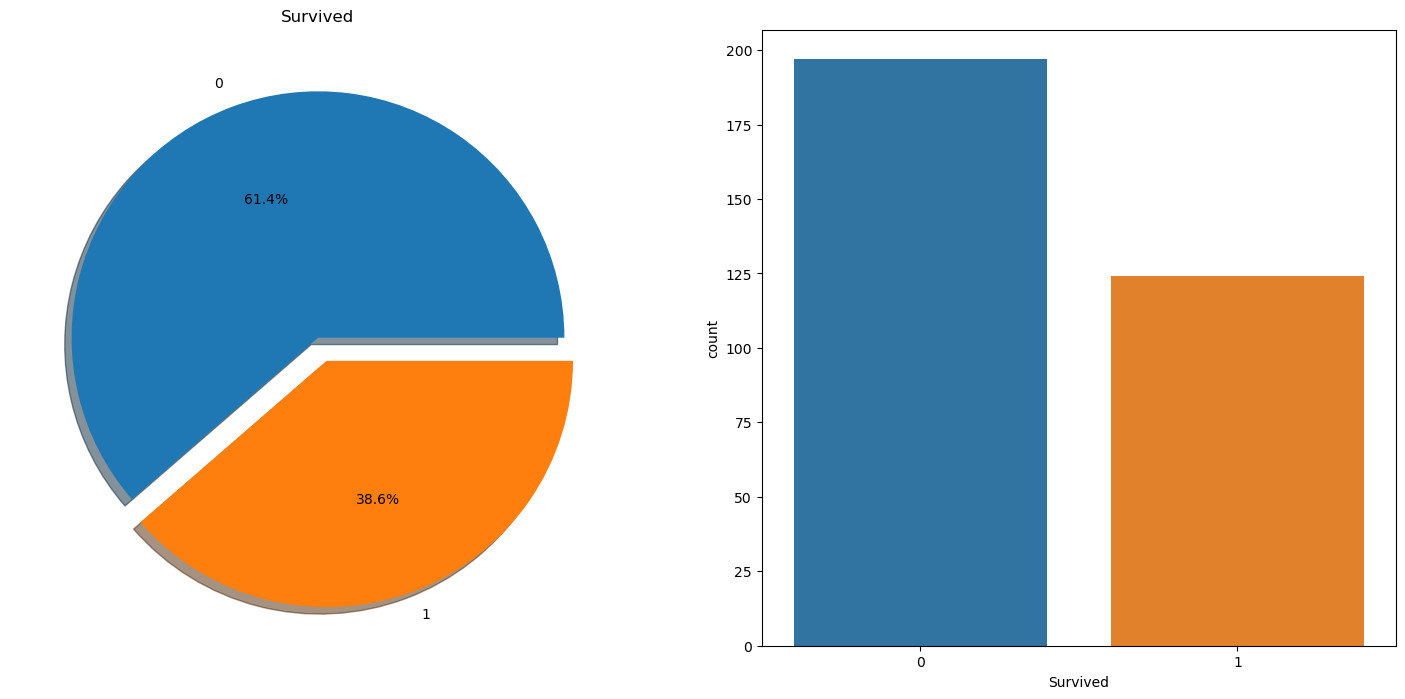

In [27]:
f,ax=plt.subplots(1,2,figsize=(18,8))
titanic['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x = 'Survived', data = titanic)
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

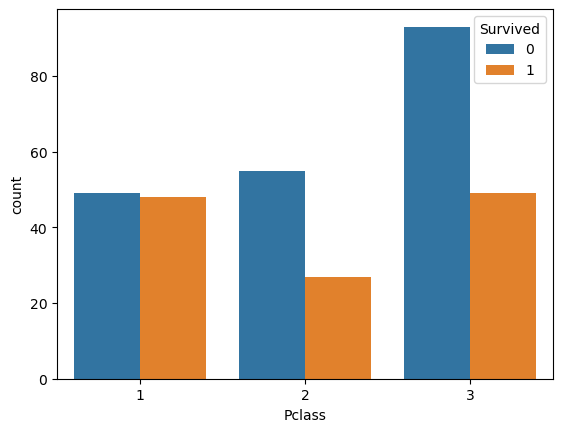

In [28]:
sns.countplot(x = 'Pclass',hue='Survived', data = titanic)

<Axes: xlabel='Sex', ylabel='count'>

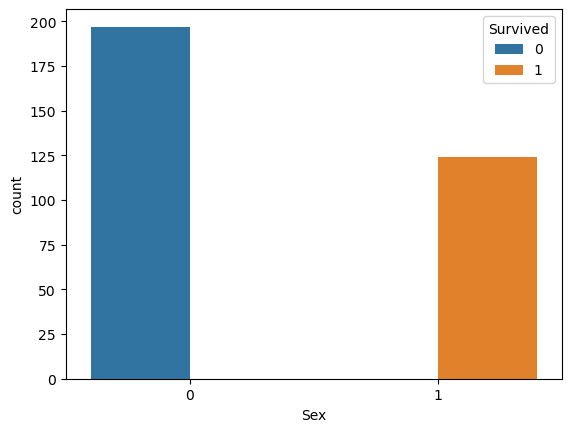

In [29]:
sns.countplot(x = 'Sex',hue='Survived', data = titanic)

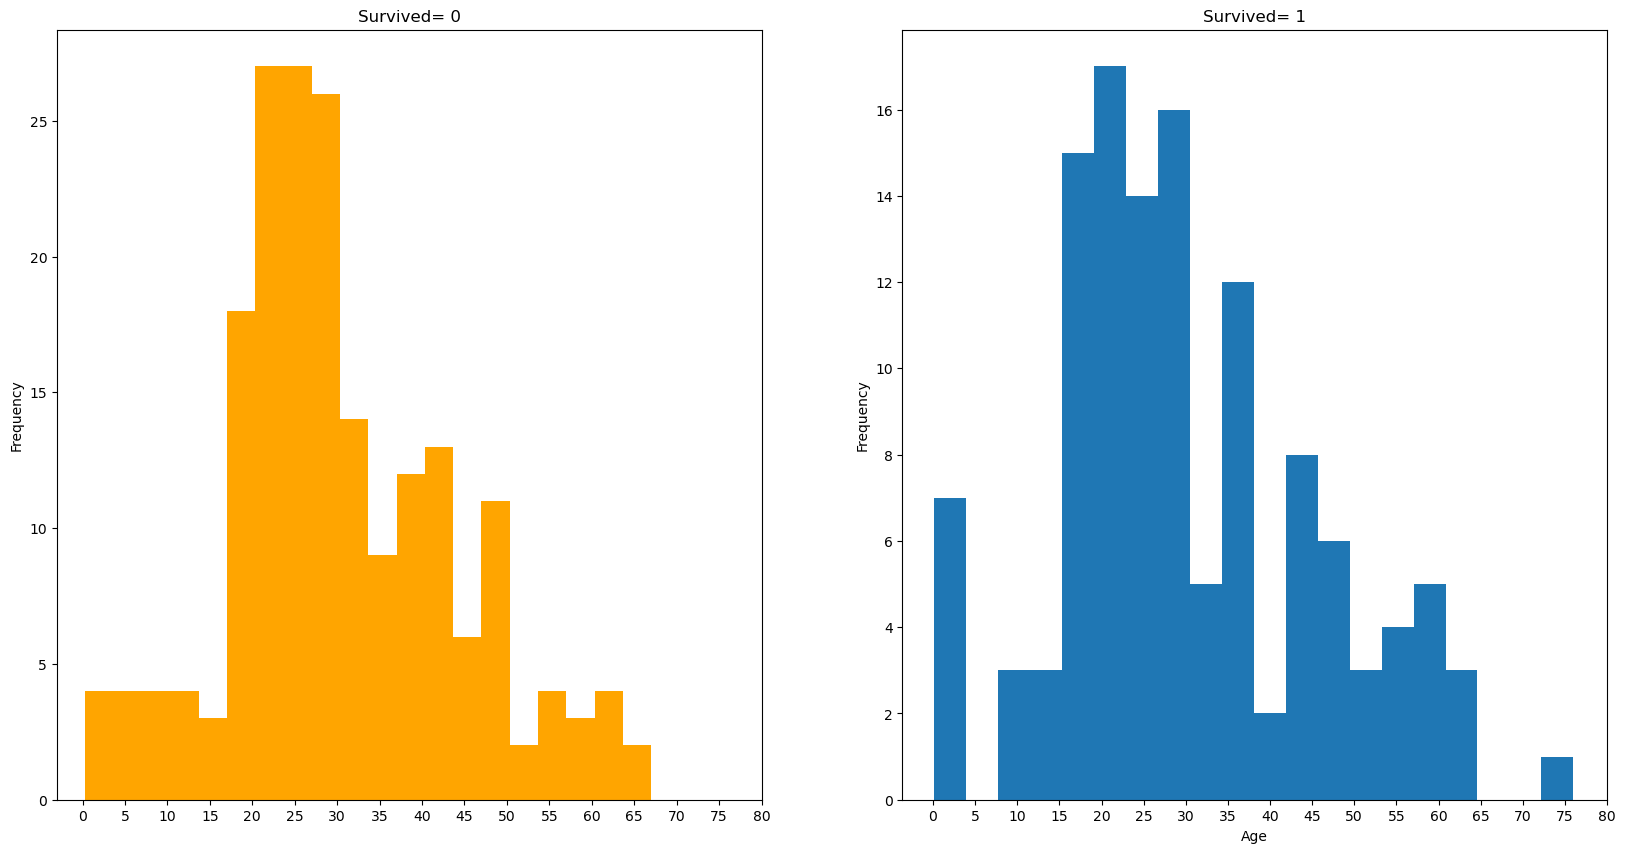

In [30]:
f,ax=plt.subplots(1,2,figsize=(20,10))
titanic[titanic['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,color = 'orange')
ax[0].set_title('Survived= 0')
plt.xlabel('Age')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
titanic[titanic['Survived']==1].Age.plot.hist(ax=ax[1],bins=20)
ax[1].set_title('Survived= 1')
plt.xlabel('Age')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

<Axes: xlabel='Embarked', ylabel='count'>

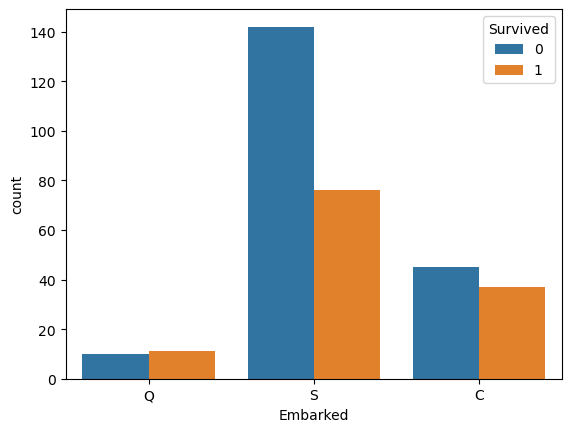

In [31]:
sns.countplot(x='Embarked',hue='Survived',data=titanic)

<Axes: xlabel='Age', ylabel='Count'>

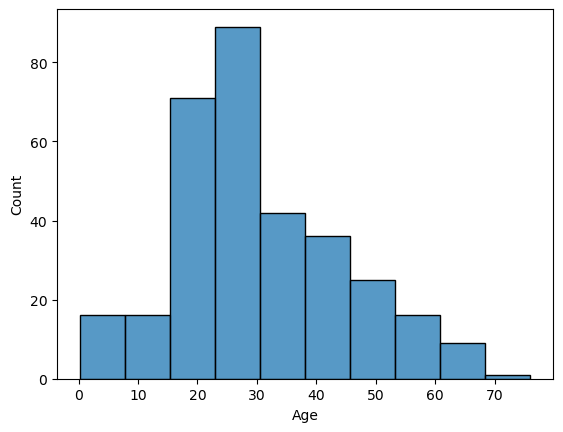

In [32]:
sns.histplot(titanic['Age'], bins = 10)

<Axes: xlabel='SibSp', ylabel='Count'>

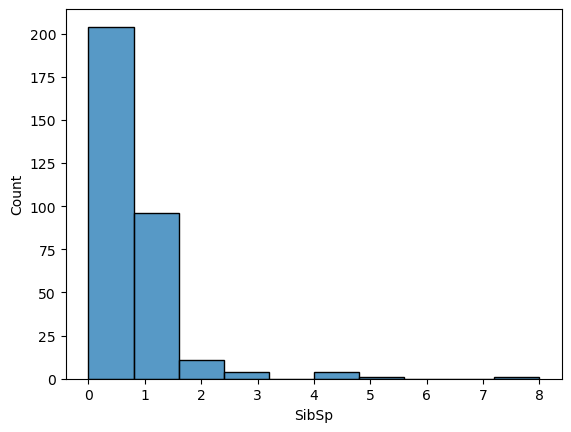

In [33]:
sns.histplot(titanic['SibSp'], bins = 10)

<Axes: xlabel='Parch', ylabel='Count'>

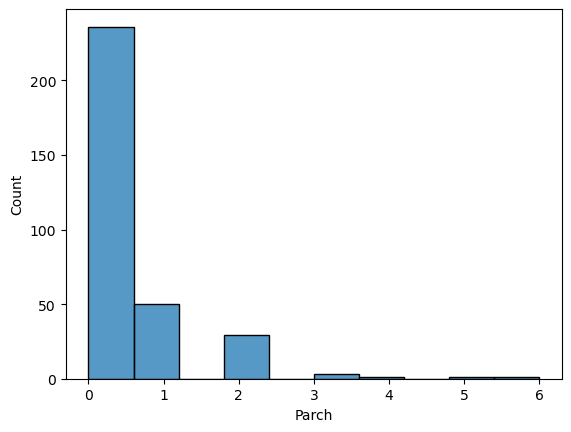

In [34]:
sns.histplot(titanic['Parch'], bins = 10)

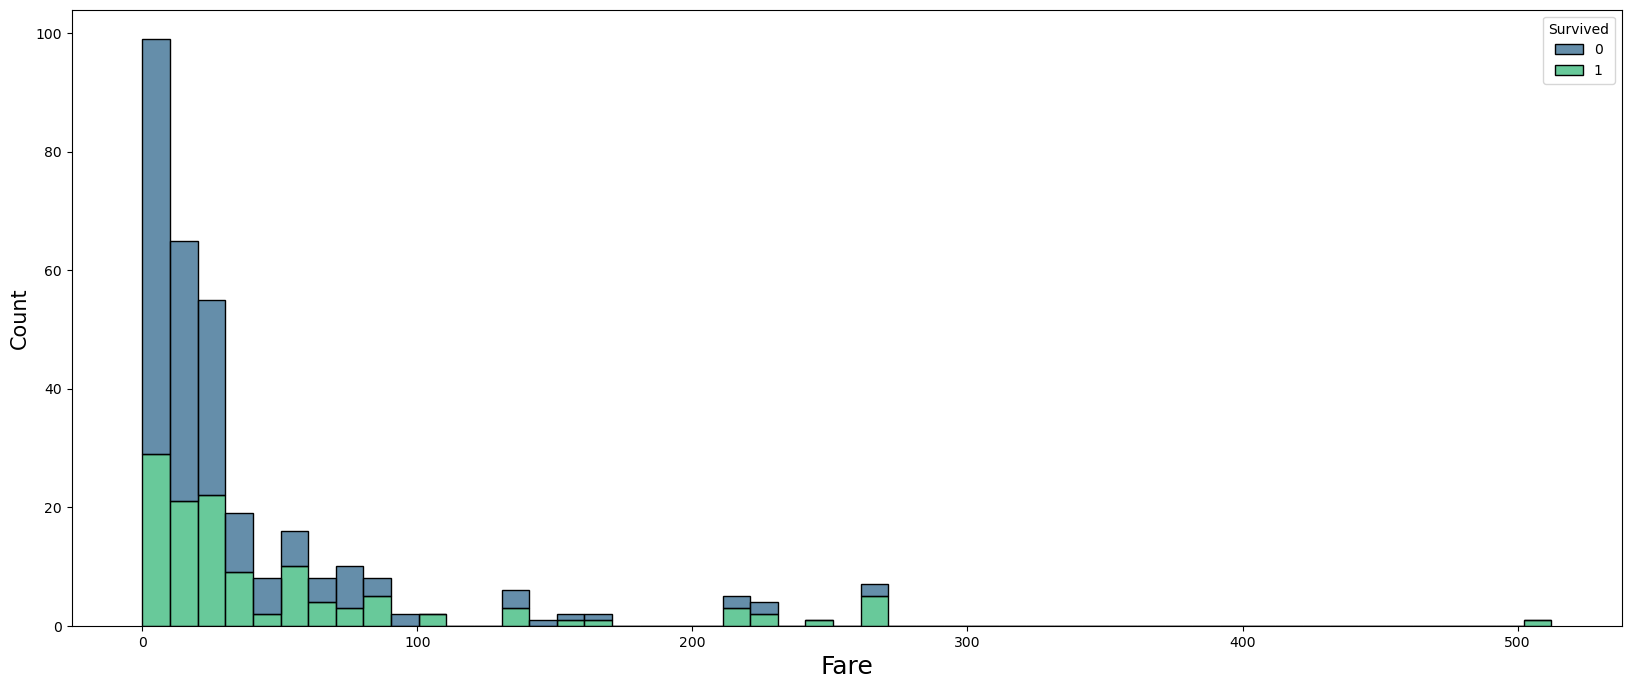

In [35]:
#Visualising the fare distribution w.r.t survival:
plt.figure(figsize = (20, 8))
sns.histplot(x = 'Fare', data = titanic, hue = 'Survived', multiple = 'stack', palette = 'viridis')
plt.xlabel('Fare', fontsize = 18)
plt.ylabel('Count', fontsize = 15)
plt.show()

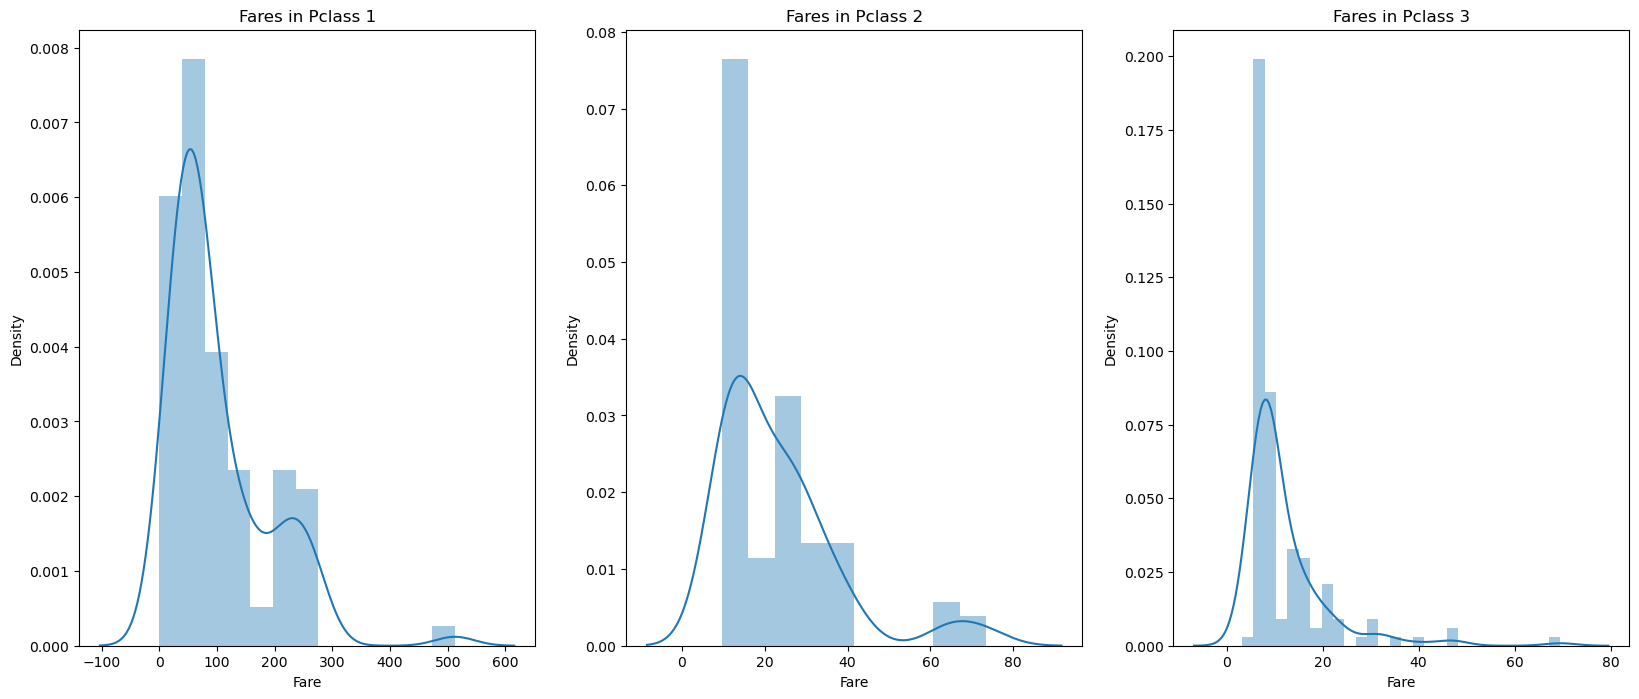

In [36]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(titanic[titanic['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(titanic[titanic['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(titanic[titanic['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

Text(0.5, 1.0, 'Correlations Among Features')

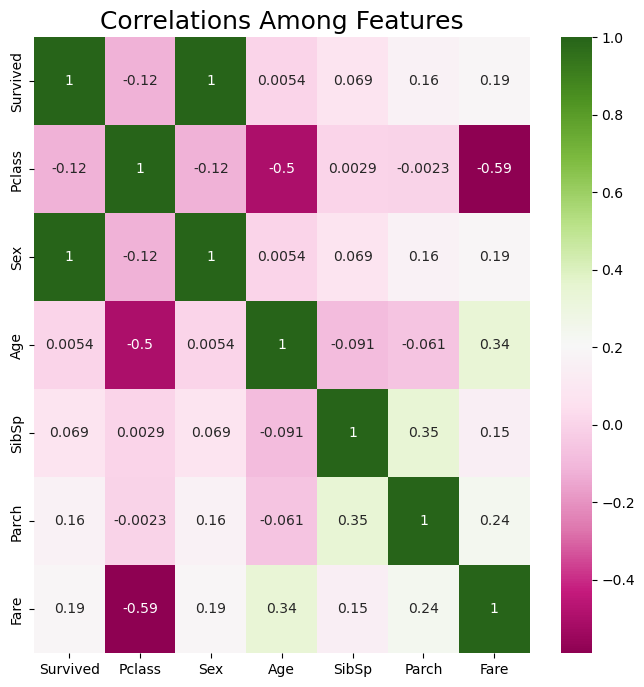

In [37]:
plt.subplots(figsize = (8,8))
sns.heatmap(titanic.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features", fontsize = 18)

In [38]:
X = titanic.drop(['Survived'], axis=1)
y = titanic["Survived"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [39]:
from sklearn.metrics import accuracy_score
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [40]:
X_train = pd.concat([X_train, pd.get_dummies(X_train['Sex'], prefix='Sex')], axis=1)
X_train.drop('Sex', axis=1, inplace=True)

# Encode 'Embarked' column
X_train = pd.concat([X_train, pd.get_dummies(X_train['Embarked'], prefix='Embarked')], axis=1)
X_train.drop('Embarked', axis=1, inplace=True)

In [41]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [42]:
X_test = pd.concat([X_test, pd.get_dummies(X_test['Sex'], prefix='Sex')], axis=1)
X_test.drop('Sex', axis=1, inplace=True)

# Encode 'Embarked' column in X_test
X_test = pd.concat([X_test, pd.get_dummies(X_test['Embarked'], prefix='Embarked')], axis=1)
X_test.drop('Embarked', axis=1, inplace=True)

In [43]:
acc_log_train = round(logreg.score(X_train, y_train)*100, 2)
acc_log_test = round(logreg.score(X_test, y_test)*100, 2)
print("Training Accuracy: %{}".format(acc_log_train))
print("Testing Accuracy: %{}".format(acc_log_test))

Training Accuracy: %100.0
Testing Accuracy: %100.0
